<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj11-credit-card-clustering?scriptVersionId=191443684" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Credit Card Clustering</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This dataset is designed for developing customer segmentation to define marketing strategies. By analyzing the usage behavior of approximately 9000 active credit card holders over the last 6 months, you can identify distinct customer segments. This segmentation can help in tailoring marketing campaigns and improving customer relationship management.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d arjunbhasin2013/ccdata
!unzip ccdata.zip

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
License(s): CC0-1.0
100%|█████████████████████████████████████████| 340k/340k [00:00<00:00, 675kB/s]
100%|█████████████████████████████████████████| 340k/340k [00:00<00:00, 675kB/s]
Archive:  ccdata.zip
  inflating: CC GENERAL.csv          


In [4]:
data = pd.read_csv('CC GENERAL.csv').copy()

# **Take a look at the data**
---

In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Exploratory Data Analysis**
---

**Univariate Analysis**

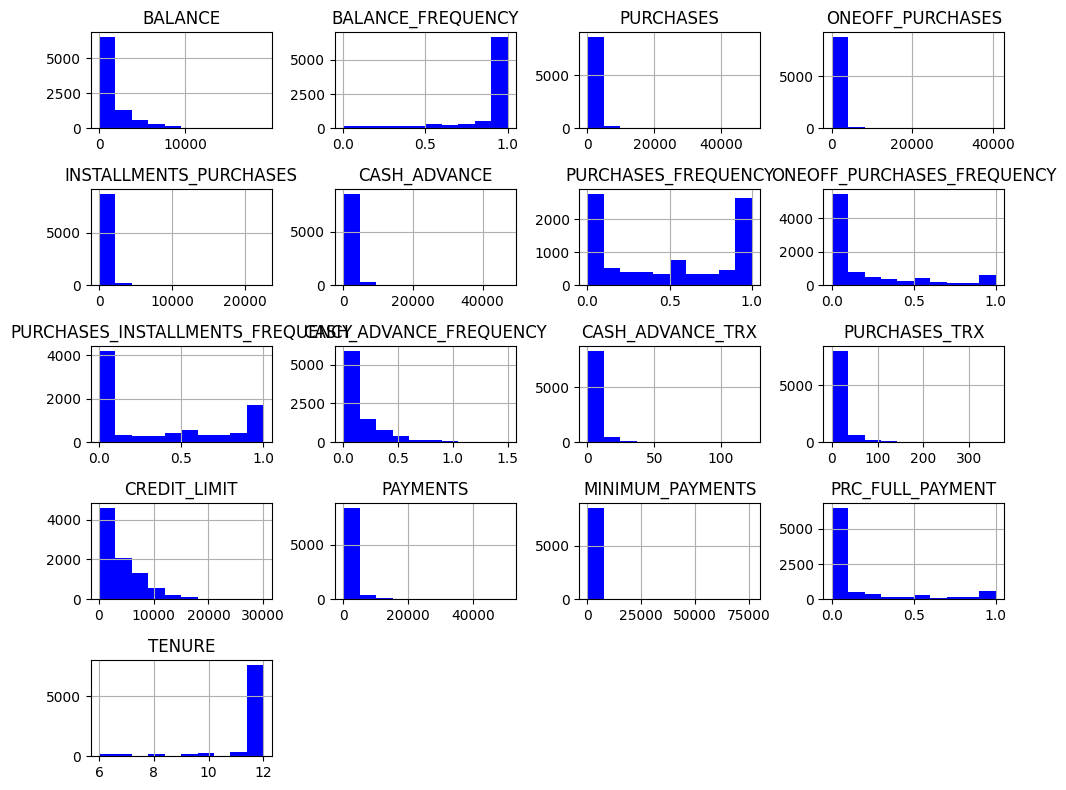

In [8]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

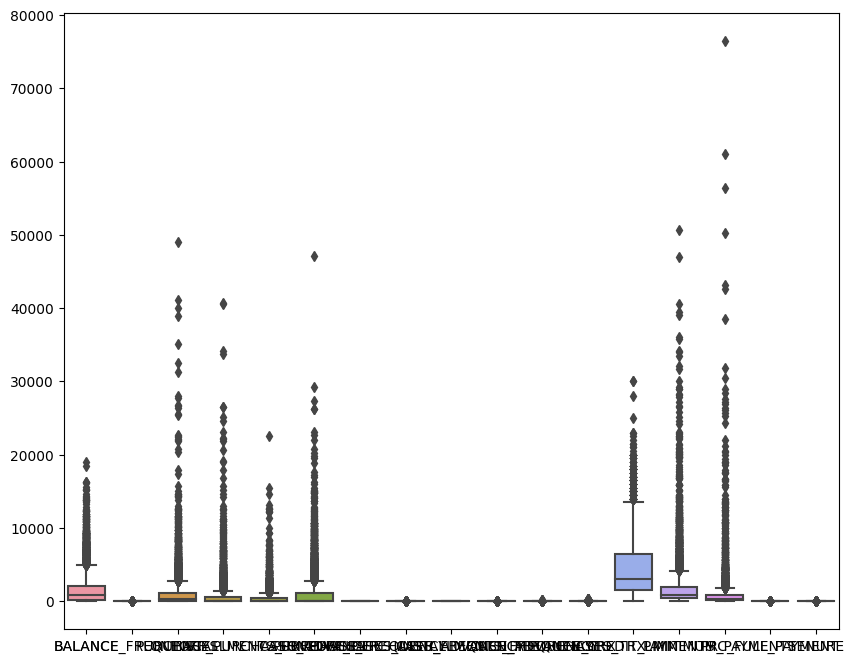

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

**Multivariate Analysis**

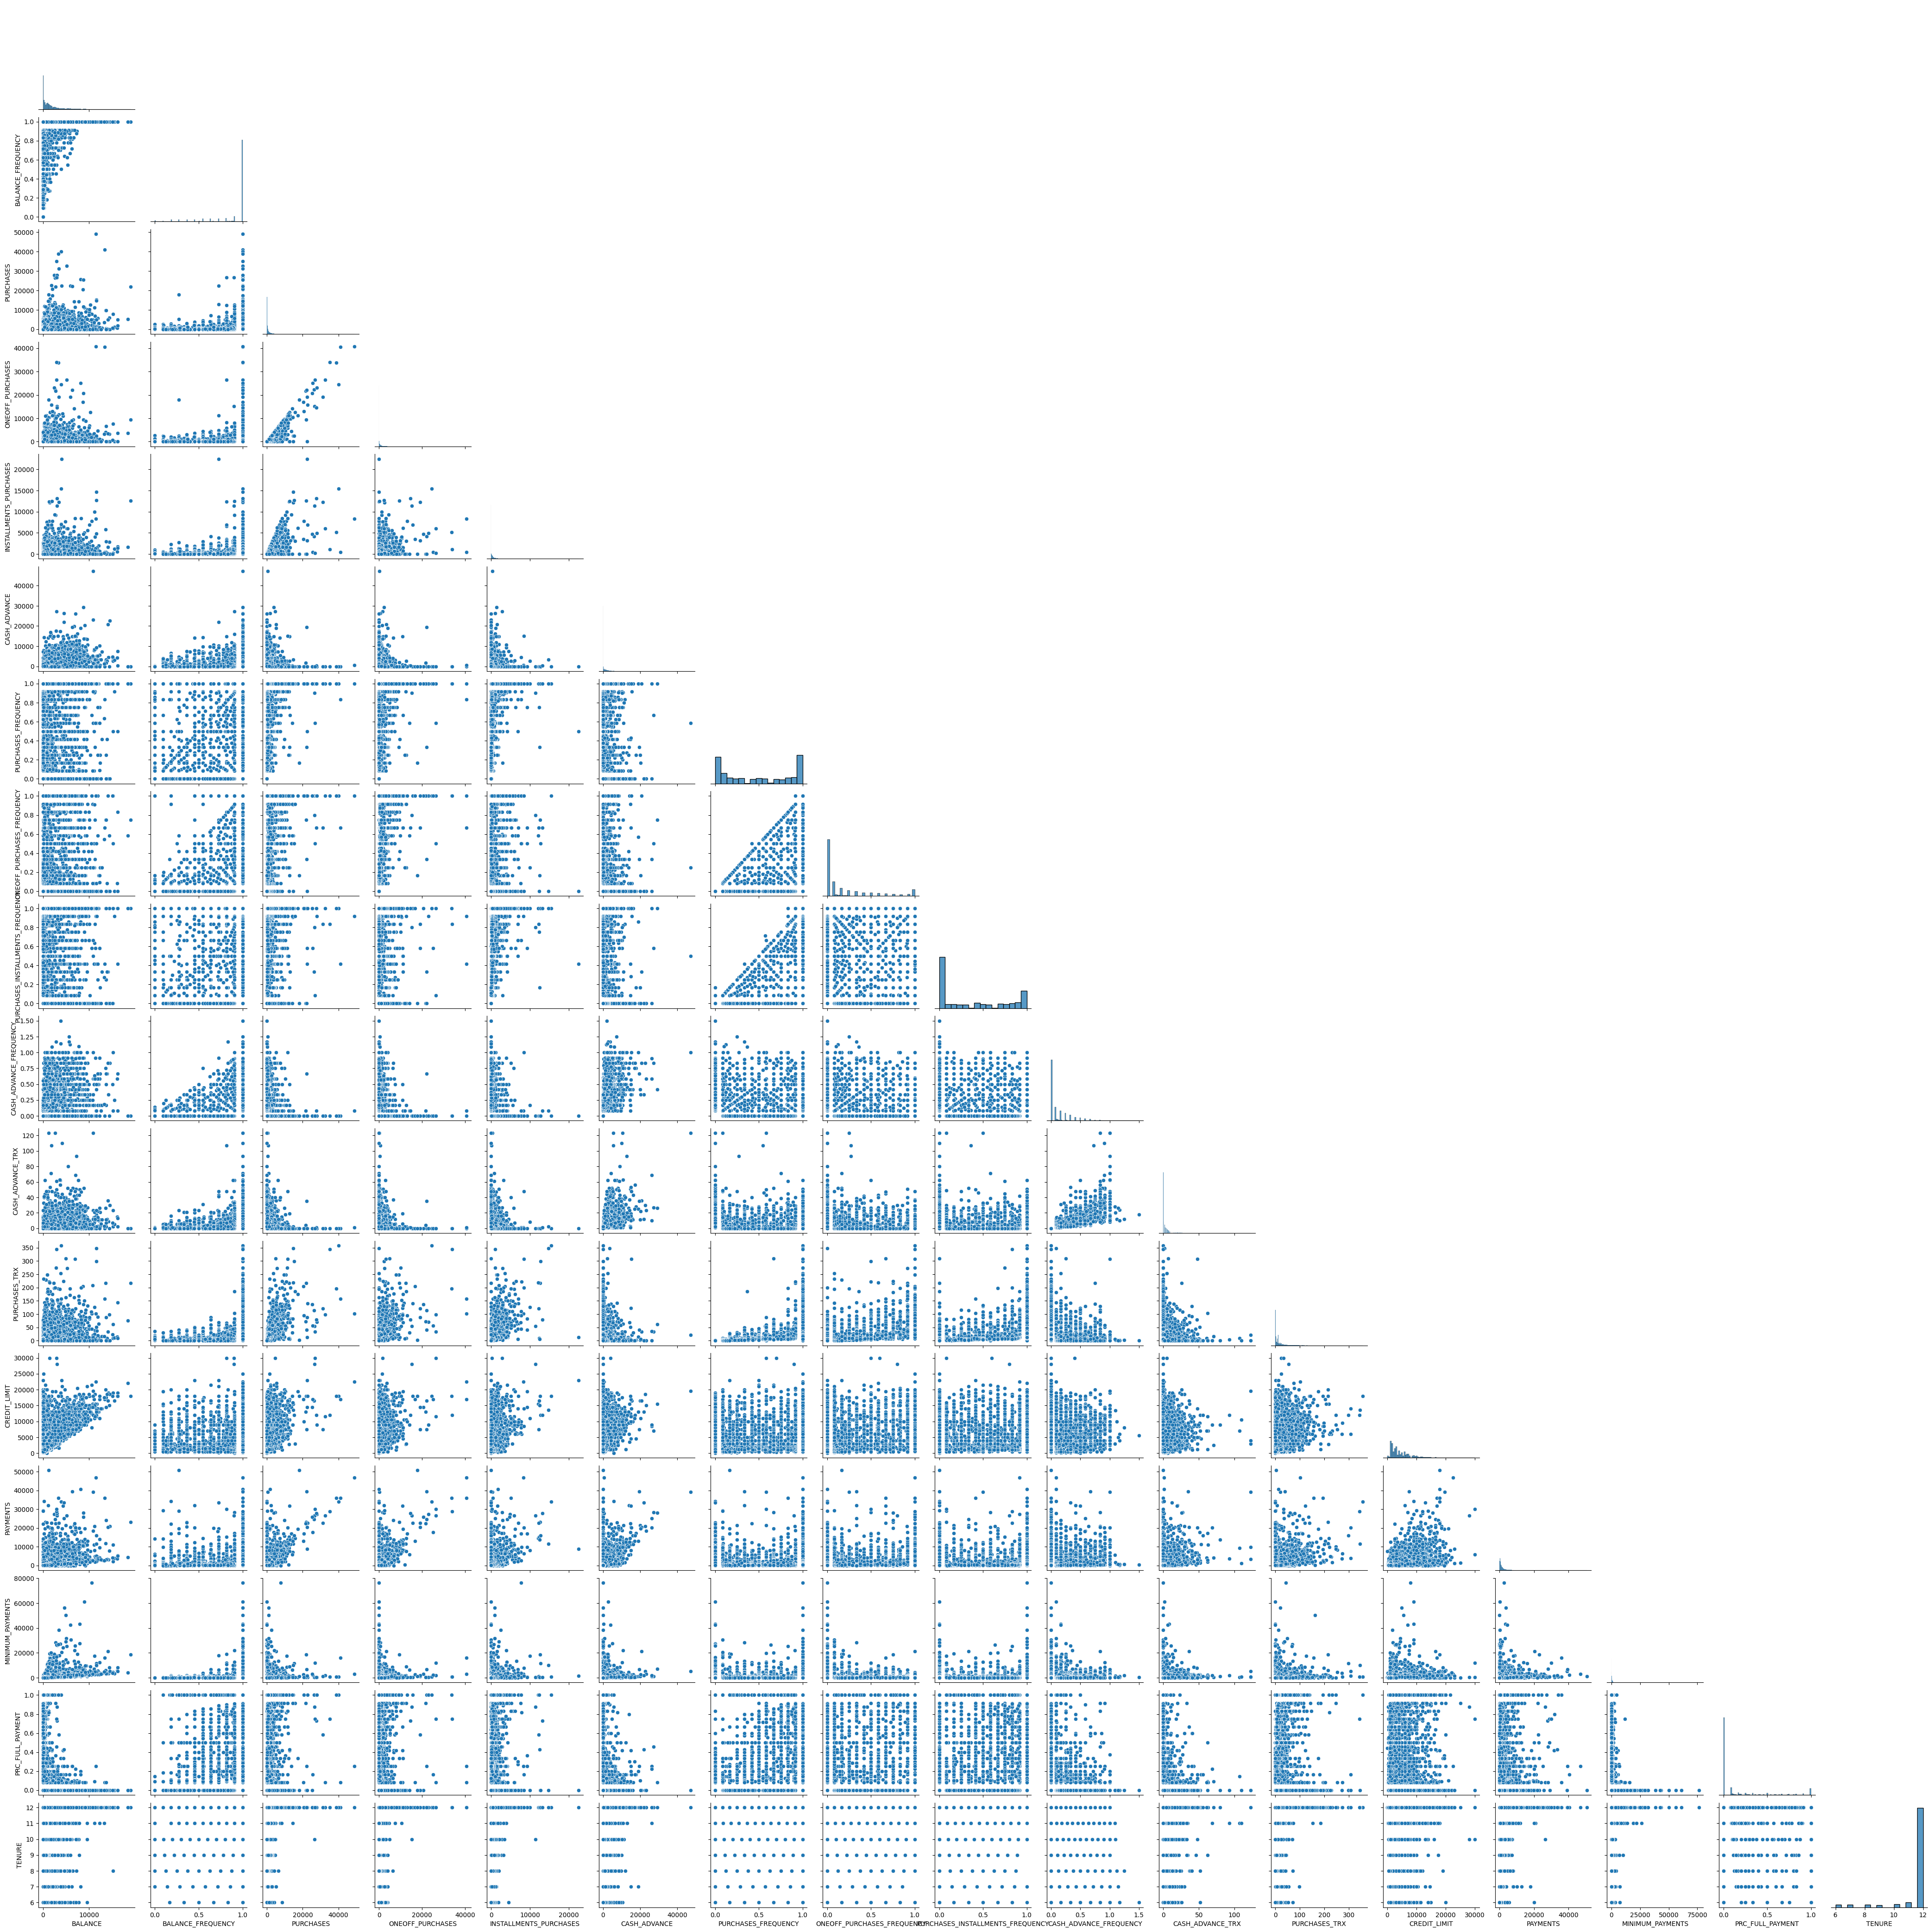

In [10]:
sns.pairplot(data.select_dtypes(include='number'),corner=True)
plt.show()

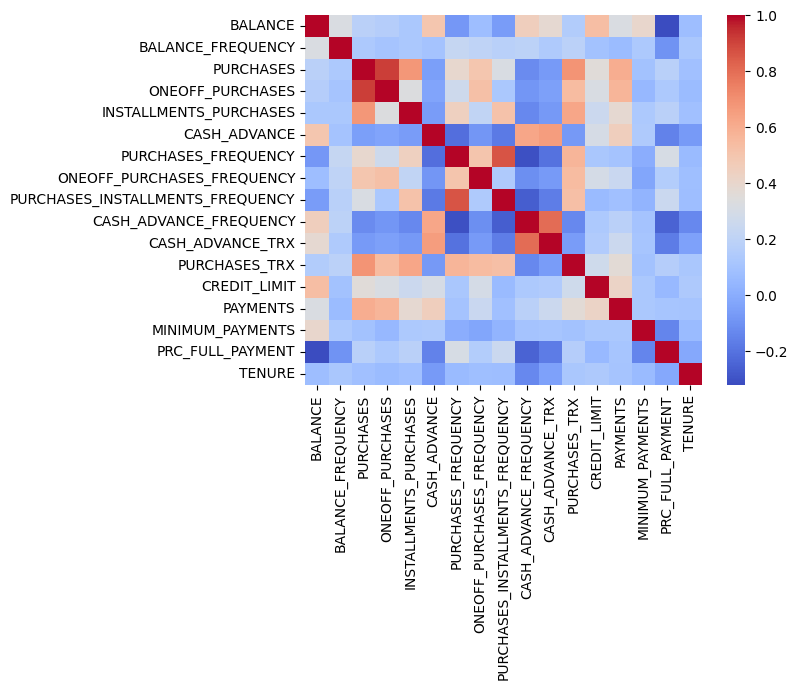

In [11]:
sns.heatmap(numerical_data.corr(), cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

In [12]:
data = data.drop('CUST_ID',axis = 1)

**Handling Duplicate Rows**

In [13]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
data = data.drop_duplicates()

Number of duplicate rows: 0


**Handling Missing Data**

In [14]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
MINIMUM_PAYMENTS,313,0.034972
CREDIT_LIMIT,1,0.000112
BALANCE,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000
PRC_FULL_PAYMENT,0,0.000000
PAYMENTS,0,0.000000
PURCHASES_TRX,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000
BALANCE_FREQUENCY,0,0.000000


In [15]:
data = data.replace(['', 'None', 'NA','NaN'], np.nan)

In [16]:
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [17]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [18]:
data.isnull().sum().sum()

0

**Dealing with Outliers**

In [19]:
data = np.log1p(data)

**Data Normalization**

In [20]:
Scalar = StandardScaler()
data = Scalar.fit_transform(data)

**PCA**

In [21]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_data = pca.fit_transform(data)
pca_data = pd.DataFrame(data = pca_data, columns = ['pca1', 'pca2'])

# **Modelling**
----------

In [22]:
X = pca_data

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans , DBSCAN , AgglomerativeClustering

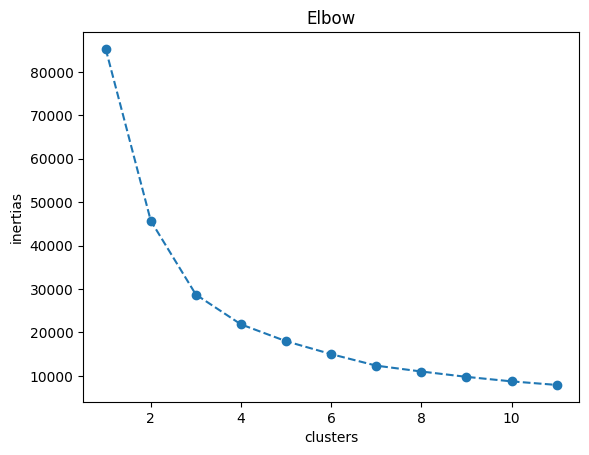

In [24]:
ilist = []
n = 12
for i in range(1,n):
    kmeans =  KMeans(n_clusters=i,random_state=33)
    kmeans.fit(X)
    ilist.append(kmeans.inertia_)

plt.plot(range(1,n), ilist , marker='o',linestyle="--" )
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()

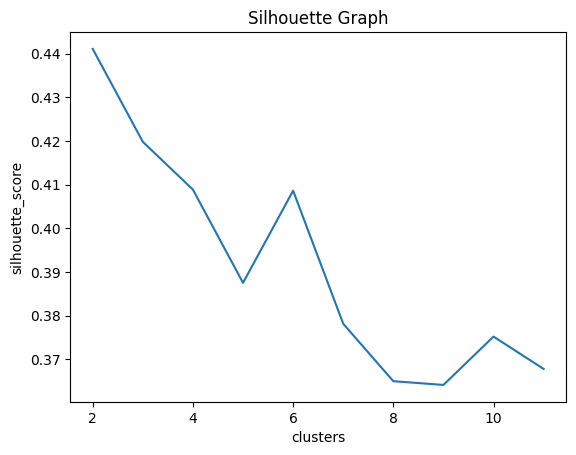

In [25]:
ilist = []
n = 12
for i in range(2,n):
    kmeans =  KMeans(n_clusters=i,random_state=33)
    kmeans.fit(X)
    label = kmeans.labels_
    ilist.append(silhouette_score(X,label))

plt.plot(range(2,n), ilist)
plt.title('Silhouette Graph')
plt.xlabel('clusters')
plt.ylabel('silhouette_score')
plt.show()

In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

algorithms = [
    ('KMeans', KMeans(n_clusters=6, random_state=33)),
    ('Agglomerative', AgglomerativeClustering(n_clusters=6))
]

for name, algorithm in algorithms:
    labels = algorithm.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f"Algorithm: {name}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print('------------------------------------------------------')


Algorithm: KMeans
Silhouette Score: 0.4086
Davies-Bouldin Index: 0.7757
Calinski-Harabasz Index: 8378.2768
------------------------------------------------------
Algorithm: Agglomerative
Silhouette Score: 0.3546
Davies-Bouldin Index: 0.8675
Calinski-Harabasz Index: 6994.7350
------------------------------------------------------


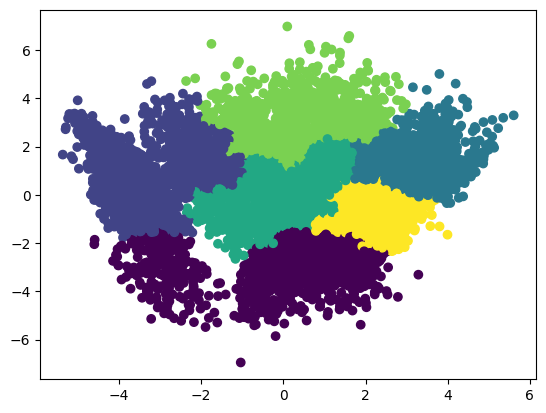

In [27]:
plt.scatter(x=pca_data['pca1'],y=pca_data['pca2'],c=labels)
plt.show()